# **BASIC RNN CODE**

In [0]:
from keras.models import Sequential
from keras.layers import SimpleRNN

#BUILDING A MODEL USING SIMPLE RNN 

model = Sequential()
model.add(SimpleRNN(3, input_shape=(2,10))) #hidden_size = 3 layer 

# same expression :: model.add(SimpleRNN(3, input_length=2, input_dim=10)) :splitting the input shape to length, dim
model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 3)                 42        
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


〽️ The total Parameters are 42.

〽️ The output shape is (none, hiddenlayersize) : can be adjusted by specifing the batch_size



In [0]:
model = Sequential()
model.add(SimpleRNN(3, batch_input_shape=(8,2,10)))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (8, 3)                    42        
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


〽️ The total Parameters are 42.

〽️ The batch input size is specified as 8,2,10 which gives the output shape as (8, hiddenlayersize)



In [0]:
model = Sequential()
model.add(SimpleRNN(3, batch_input_shape=(8,2,10), return_sequences=True))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_3 (SimpleRNN)     (8, 2, 3)                 42        
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


〽️ Specifing return_sequences to True makes the output shape to have a 3 dimensional shape 


# **BASIC LSTM**


〽️ Basic RNN problem (problem of Long-Term Dependencies) :As the time-step becomes deeper, looses earlier input data 

〽️ To improve data memory -> LSTM (Long Sort-Term Memory)  

〽️ Has input, output, delete steps


# **RNN ANALYSIS**

〽️ Many-to-one RNN 

〽️ Predicting next word after sequence 




In [0]:
#PREPROCESSING DATA 

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from tensorflow.keras.utils import to_categorical

text="""경마장에 있는 말이 뛰고 있다\n
그의 말이 법이다\n
가는 말이 고와야 오는 말이 곱다\n"""

In [0]:


t = Tokenizer() #tockenize the textdata 
t.fit_on_texts([text])


vocab_size = len(t.word_index) + 1 

print('단어 집합의 크기 : %d' % vocab_size)

단어 집합의 크기 : 12


In [0]:
 #there are 11 words  in the tockenized dictionary 

t.word_index

{'가는': 8,
 '경마장에': 2,
 '고와야': 9,
 '곱다': 11,
 '그의': 6,
 '뛰고': 4,
 '말이': 1,
 '법이다': 7,
 '오는': 10,
 '있는': 3,
 '있다': 5}

In [0]:
#Making the train-data-set 

sequences = list()

for line in text.split('\n'): #split according to \n  
    encoded = t.texts_to_sequences([line])[0]
    for i in range(1, len(encoded)):
        sequence = encoded[:i+1]
        sequences.append(sequence)

print('학습에 사용할 샘플의 개수: %d' % len(sequences))

print(sequences) #the sequence are printed out as the index 

학습에 사용할 샘플의 개수: 11
[[2, 3], [2, 3, 1], [2, 3, 1, 4], [2, 3, 1, 4, 5], [6, 1], [6, 1, 7], [8, 1], [8, 1, 9], [8, 1, 9, 10], [8, 1, 9, 10, 1], [8, 1, 9, 10, 1, 11]]


In [0]:
max_len=max(len(l) for l in sequences) #get the longest sample
print('샘플의 최대 길이 : {}'.format(max_len))

#according to the longest sample , padd the samples

sequences = pad_sequences(sequences, maxlen=max_len, padding='pre')

print(sequences) #all are length of 6 with zeros inside 

샘플의 최대 길이 : 6
[[ 0  0  0  0  2  3]
 [ 0  0  0  2  3  1]
 [ 0  0  2  3  1  4]
 [ 0  2  3  1  4  5]
 [ 0  0  0  0  6  1]
 [ 0  0  0  6  1  7]
 [ 0  0  0  0  8  1]
 [ 0  0  0  8  1  9]
 [ 0  0  8  1  9 10]
 [ 0  8  1  9 10  1]
 [ 8  1  9 10  1 11]]


In [0]:
#split the x,y 
sequences = np.array(sequences)
X = sequences[:,:-1]
y = sequences[:,-1]

print(X)

print(y) #next word after the x's 

[[ 0  0  0  0  2]
 [ 0  0  0  2  3]
 [ 0  0  2  3  1]
 [ 0  2  3  1  4]
 [ 0  0  0  0  6]
 [ 0  0  0  6  1]
 [ 0  0  0  0  8]
 [ 0  0  0  8  1]
 [ 0  0  8  1  9]
 [ 0  8  1  9 10]
 [ 8  1  9 10  1]]
[ 3  1  4  5  1  7  1  9 10  1 11]


In [0]:
#one-hot encode the y's 
y = to_categorical(y, num_classes=vocab_size)
print(y)


[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [0]:
#Modeling with RNN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, SimpleRNN

model = Sequential()

#vocab_size = len(t.word_index) + 1 :because keras-one-hot-encoding index starts at 0 


model.add(Embedding(vocab_size, 10, input_length=max_len-1)) #embedd into 10 dimenstion, with input length of 5(since we splitted x,y)

model.add(SimpleRNN(32)) #hidden units 32 

model.add(Dense(vocab_size, activation='softmax')) #output layer 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=200, verbose=2)

Epoch 1/200
1/1 - 0s - loss: 2.4609 - accuracy: 0.1818
Epoch 2/200
1/1 - 0s - loss: 2.4491 - accuracy: 0.2727
Epoch 3/200
1/1 - 0s - loss: 2.4374 - accuracy: 0.2727
Epoch 4/200
1/1 - 0s - loss: 2.4255 - accuracy: 0.2727
Epoch 5/200
1/1 - 0s - loss: 2.4133 - accuracy: 0.3636
Epoch 6/200
1/1 - 0s - loss: 2.4009 - accuracy: 0.4545
Epoch 7/200
1/1 - 0s - loss: 2.3879 - accuracy: 0.4545
Epoch 8/200
1/1 - 0s - loss: 2.3744 - accuracy: 0.4545
Epoch 9/200
1/1 - 0s - loss: 2.3603 - accuracy: 0.4545
Epoch 10/200
1/1 - 0s - loss: 2.3455 - accuracy: 0.4545
Epoch 11/200
1/1 - 0s - loss: 2.3300 - accuracy: 0.4545
Epoch 12/200
1/1 - 0s - loss: 2.3136 - accuracy: 0.4545
Epoch 13/200
1/1 - 0s - loss: 2.2963 - accuracy: 0.4545
Epoch 14/200
1/1 - 0s - loss: 2.2782 - accuracy: 0.4545
Epoch 15/200
1/1 - 0s - loss: 2.2590 - accuracy: 0.4545
Epoch 16/200
1/1 - 0s - loss: 2.2388 - accuracy: 0.4545
Epoch 17/200
1/1 - 0s - loss: 2.2176 - accuracy: 0.4545
Epoch 18/200
1/1 - 0s - loss: 2.1954 - accuracy: 0.4545
E

In [0]:
def sentence_generation(model, t, current_word, n): 
    init_word = current_word 
    sentence = ''
    for _ in range(n): 
        encoded = t.texts_to_sequences([current_word])[0] 
        encoded = pad_sequences([encoded], maxlen=5, padding='pre') 
        result = model.predict_classes(encoded, verbose=0)
 
        for word, index in t.word_index.items(): 
            if index == result: 
                break 
        current_word = current_word + ' '  + word 
        
        sentence = sentence + ' ' + word 
        
    sentence = init_word + sentence
    return sentence


print(sentence_generation(model, t, '경마장에', 4))
print(sentence_generation(model, t, '가는', 3))
print(sentence_generation(model, t, '그의', 4))

경마장에 있는 말이 뛰고 있다
가는 말이 고와야 오는
그의 말이 법이다 오는 말이


〽️ Need a lot of training 

〽️ Not that accuracte when printed out 

# **LSTM ANALYSIS**

〽️ Many-to-one LSTM 

〽️ Predicting next word after sequence 




In [0]:
import pandas as pd
from string import punctuation
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from tensorflow.keras.utils import to_categorical

df=pd.read_csv('ArticlesApril2018.csv')

print('열의 개수: ',len(df.columns))
print(df.columns) #see columns in df 
df['headline'].isnull().values.any() #check null values 

df.head(1) #see first row 


열의 개수:  15
Index(['articleID', 'articleWordCount', 'byline', 'documentType', 'headline',
       'keywords', 'multimedia', 'newDesk', 'printPage', 'pubDate',
       'sectionName', 'snippet', 'source', 'typeOfMaterial', 'webURL'],
      dtype='object')


,articleID,articleWordCount,byline,documentType,headline,keywords,multimedia,newDesk,printPage,pubDate,sectionName,snippet,source,typeOfMaterial,webURL
0,5adf6684068401528a2aa69b,781,By JOHN BRANCH,article,Former N.F.L. Cheerleaders’ Settlement Offer: ...,"['Workplace Hazards and Violations', 'Football...",68,Sports,0,2018-04-24 17:16:49,Pro Football,"“I understand that they could meet with us, pa...",The New York Times,News,https://www.nytimes.com/2018/04/24/sports/foot...


In [0]:
#PREPROCESSING 

#delete data without headline
headline = [] 
headline.extend(list(df.headline.values)) #collect headline info 


headline = [n for n in headline if n != "Unknown"] 

print('노이즈값 제거 후 샘플의 개수 : {}'.format(len(headline)))
headline[:5]

노이즈값 제거 후 샘플의 개수 : 1214


['Former N.F.L. Cheerleaders’ Settlement Offer: $1 and a Meeting With Goodell',
 'E.P.A. to Unveil a New Rule. Its Effect: Less Science in Policymaking.',
 'The New Noma, Explained',
 'How a Bag of Texas Dirt  Became a Times Tradition',
 'Is School a Place for Self-Expression?']

In [0]:
def repreprocessing(s):
    s=s.encode("utf8").decode("ascii",'ignore')
    return ''.join(c for c in s if c not in punctuation).lower() # delete punctuation and make lower case 

text = [repreprocessing(x) for x in headline]
text[:5]

['former nfl cheerleaders settlement offer 1 and a meeting with goodell',
 'epa to unveil a new rule its effect less science in policymaking',
 'the new noma explained',
 'how a bag of texas dirt  became a times tradition',
 'is school a place for selfexpression']

In [0]:
#tockenizing words
t = Tokenizer()
t.fit_on_texts(text)

vocab_size = len(t.word_index) + 1

print('단어 집합의 크기 : %d' % vocab_size)

단어 집합의 크기 : 3494


In [0]:
#incode as num

sequences = list()

for line in text: 
    encoded = t.texts_to_sequences([line])[0] 
    for i in range(1, len(encoded)):
        sequence = encoded[:i+1]
        sequences.append(sequence)

sequences[:11]

[[99, 269],
 [99, 269, 371],
 [99, 269, 371, 1115],
 [99, 269, 371, 1115, 582],
 [99, 269, 371, 1115, 582, 52],
 [99, 269, 371, 1115, 582, 52, 7],
 [99, 269, 371, 1115, 582, 52, 7, 2],
 [99, 269, 371, 1115, 582, 52, 7, 2, 372],
 [99, 269, 371, 1115, 582, 52, 7, 2, 372, 10],
 [99, 269, 371, 1115, 582, 52, 7, 2, 372, 10, 1116],
 [100, 3]]

In [0]:
#make easy access of words by the index by function 

index_to_word={}
for key, value in t.word_index.items(): 
    index_to_word[value] = key

print('빈도수 상위 582번 단어 : {}'.format(index_to_word[582]))

빈도수 상위 582번 단어 : offer


In [0]:
#padd dataset according to longest sequence 

max_len=max(len(l) for l in sequences)
print('샘플의 최대 길이 : {}'.format(max_len))
sequences = pad_sequences(sequences, maxlen=max_len, padding='pre')
print(sequences[:3])

샘플의 최대 길이 : 24
[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0   99  269]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0   99  269  371]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0   99  269  371 1115]]


In [0]:
#split x,y 
sequences = np.array(sequences)
X = sequences[:,:-1]
y = sequences[:,-1]
y = to_categorical(y, num_classes=vocab_size) #onehot encoding of y
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [0]:
#MODELING

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM

#MODEL
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=max_len-1)) #same as simple RNN 

model.add(LSTM(128)) #use lstm layer with 128 hidden units 
model.add(Dense(vocab_size, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=200, verbose=2)

Epoch 1/200
244/244 - 7s - loss: 7.6426 - accuracy: 0.0250
Epoch 2/200
244/244 - 7s - loss: 7.1067 - accuracy: 0.0304
Epoch 3/200
244/244 - 7s - loss: 6.9786 - accuracy: 0.0363
Epoch 4/200
244/244 - 7s - loss: 6.8557 - accuracy: 0.0408
Epoch 5/200
244/244 - 7s - loss: 6.7023 - accuracy: 0.0473
Epoch 6/200
244/244 - 7s - loss: 6.5288 - accuracy: 0.0472
Epoch 7/200
244/244 - 7s - loss: 6.3340 - accuracy: 0.0545
Epoch 8/200
244/244 - 7s - loss: 6.1313 - accuracy: 0.0607
Epoch 9/200
244/244 - 7s - loss: 5.9262 - accuracy: 0.0642
Epoch 10/200
244/244 - 7s - loss: 5.7320 - accuracy: 0.0674
Epoch 11/200
244/244 - 7s - loss: 5.5523 - accuracy: 0.0734
Epoch 12/200
244/244 - 7s - loss: 5.3812 - accuracy: 0.0787
Epoch 13/200
244/244 - 7s - loss: 5.2210 - accuracy: 0.0830
Epoch 14/200
244/244 - 7s - loss: 5.0672 - accuracy: 0.0882
Epoch 15/200
244/244 - 7s - loss: 4.9224 - accuracy: 0.0980
Epoch 16/200
244/244 - 7s - loss: 4.7836 - accuracy: 0.1089
Epoch 17/200
244/244 - 7s - loss: 4.6526 - accura

In [0]:
def sentence_generation(model, t, current_word, n): 
  # 모델, 토크나이저, 현재 단어, 반복할 횟수
    init_word = current_word 
    
    sentence = ''
    for _ in range(n): 
      
        encoded = t.texts_to_sequences([current_word])[0] # 현재 단어에 대한 정수 인코딩

        encoded = pad_sequences([encoded], maxlen=23, padding='pre') # 데이터에 대한 패딩
        result = model.predict_classes(encoded, verbose=0)
    
    # 입력한 X(현재 단어)에 대해서 y를 예측하고 y(예측한 단어)를 result에 저장.
        for word, index in t.word_index.items(): 

            if index == result: # 만약 예측한 단어와 인덱스와 동일한 단어가 있다면

                break # 해당 단어가 예측 단어이므로 break

        current_word = current_word + ' '  + word # 현재 단어 + ' ' + 예측 단어를 현재 단어로 변경
        sentence = sentence + ' ' + word # 예측 단어를 문장에 저장
   
   
    sentence = init_word + sentence
    return sentence

print(sentence_generation(model, t, 'i', 20))
print(sentence_generation(model, t, 'how', 20))

i disapprove of school vouchers can i still apply for them in fears over weapons too columbia we my them too
how to make facebook more accountable as china triumph of contradiction ousted against we we risks do it human life spreads


# **Tagging Task using Keras**

〽️ Many-to-many RNN 

〽️ Uses Bidirectional RNN-LSTM (seeing later input data too) 

〽️ Predicting the tag of the input 




In [0]:
import re
%matplotlib inline
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np

f = open('train.txt', 'r')
tagged_sentences = []
sentence = []

#read the dataset by reading lines 

for line in f:
    if len(line)==0 or line.startswith('-DOCSTART') or line[0]=="\n":
        if len(sentence) > 0:
            tagged_sentences.append(sentence)
            sentence = []
        continue
    splits = line.split(' ') # split words according to sapce 
    splits[-1] = re.sub(r'\n', '', splits[-1]) # delete \n
    word = splits[0].lower() #make lower 
    sentence.append([word, splits[-1]]) 

print(tagged_sentences[0]) #trainset is sequences with tag information included 

[['eu', 'B-ORG'], ['rejects', 'O'], ['german', 'B-MISC'], ['call', 'O'], ['to', 'O'], ['boycott', 'O'], ['british', 'B-MISC'], ['lamb', 'O'], ['.', 'O']]


In [0]:
sentences, ner_tags = [], [] 

for tagged_sentence in tagged_sentences:

    sentence, tag_info = zip(*tagged_sentence) #save/split the data into sentence and tag_info 
    sentences.append(list(sentence)) #save only the words into sentences list 
    ner_tags.append(list(tag_info)) #save the tag info into the ner_tag list 


#all words, tags are saved to seperate lists 
print(sentences[0])
print(ner_tags[0])

['eu', 'rejects', 'german', 'call', 'to', 'boycott', 'british', 'lamb', '.']
['B-ORG', 'O', 'B-MISC', 'O', 'O', 'O', 'B-MISC', 'O', 'O']


샘플의 최대 길이 : 113
샘플의 평균 길이 : 14.502635


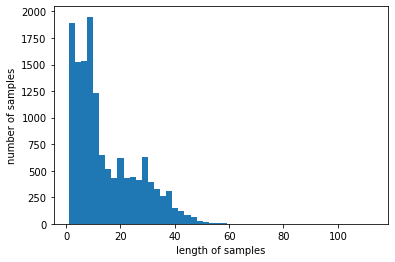

In [0]:
#eda of dataset 

print('샘플의 최대 길이 : %d' % max(len(l) for l in sentences))
print('샘플의 평균 길이 : %f' % (sum(map(len, sentences))/len(sentences)))
plt.hist([len(s) for s in sentences], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [0]:
max_words = 4000

#tokenize word
src_tokenizer = Tokenizer(num_words=max_words, oov_token='OOV') #use only top 4000 words 
src_tokenizer.fit_on_texts(sentences)

#tokenzie tag
tar_tokenizer = Tokenizer()
tar_tokenizer.fit_on_texts(ner_tags)

vocab_size = max_words
tag_size = len(tar_tokenizer.word_index) + 1
print('단어 집합의 크기 : {}'.format(vocab_size))
print('개체명 태깅 정보 집합의 크기 : {}'.format(tag_size))

X_train = src_tokenizer.texts_to_sequences(sentences)
y_train = tar_tokenizer.texts_to_sequences(ner_tags)

print(X_train[0])
print(y_train[0])

단어 집합의 크기 : 4000
개체명 태깅 정보 집합의 크기 : 10
[989, 1, 205, 629, 7, 3939, 216, 1, 3]
[4, 1, 7, 1, 1, 1, 7, 1, 1]


In [0]:

#for easier access make sure to re-produce the words from index

index_to_word = src_tokenizer.index_word
index_to_ner = tar_tokenizer.index_word

#example for decoding the words 
decoded = []
for index in X_train[0] : #only for the first row 
    decoded.append(index_to_word[index]) #index->words

print('기존 문장 : {}'.format(sentences[0]))
print('빈도수가 낮은 단어가 OOV 처리된 문장 : {}'.format(decoded))

기존 문장 : ['eu', 'rejects', 'german', 'call', 'to', 'boycott', 'british', 'lamb', '.']
빈도수가 낮은 단어가 OOV 처리된 문장 : ['eu', 'OOV', 'german', 'call', 'to', 'boycott', 'british', 'OOV', '.']


In [0]:
max_len = 70
#only use 70 for length 
X_train = pad_sequences(X_train, padding='post', maxlen=max_len)

y_train = pad_sequences(y_train, padding='post', maxlen=max_len)

#split dataset 
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=.2, random_state=12)
y_train = to_categorical(y_train, num_classes=tag_size)
y_test = to_categorical(y_test, num_classes=tag_size)

print('훈련 샘플 문장의 크기 : {}'.format(X_train.shape))
print('훈련 샘플 레이블의 크기 : {}'.format(y_train.shape))
print('테스트 샘플 문장의 크기 : {}'.format(X_test.shape))
print('테스트 샘플 레이블의 크기 : {}'.format(y_test.shape))

훈련 샘플 문장의 크기 : (11232, 70)
훈련 샘플 레이블의 크기 : (11232, 70, 10)
테스트 샘플 문장의 크기 : (2808, 70)
테스트 샘플 레이블의 크기 : (2808, 70, 10)


In [0]:
#Modeling

from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Bidirectional, TimeDistributed
from keras.optimizers import Adam

model = Sequential()

model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len, mask_zero=True))
model.add(Bidirectional(LSTM(256, return_sequences=True))) #use bidirectional lstm
model.add(TimeDistributed(Dense(tag_size, activation='softmax')))

model.compile(loss='categorical_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])


model.fit(X_train, y_train, batch_size=128, epochs=3,  validation_data=(X_test, y_test)) #less training -> less epochs 

print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 11232 samples, validate on 2808 samples
Epoch 1/3
11232/11232 [==============================] - 146s 13ms/step - loss: 0.1848 - accuracy: 0.8241 - val_loss: 0.1326 - val_accuracy: 0.8324
Epoch 2/3
11232/11232 [==============================] - 145s 13ms/step - loss: 0.0981 - accuracy: 0.8572 - val_loss: 0.0783 - val_accuracy: 0.8888
Epoch 3/3
2808/2808 [==============================] - 13s 5ms/step

 테스트 정확도: 0.9269


In [0]:
#try on specific data : easy to visualzie 

i=10 #try out by prinitng out the words 
y_predicted = model.predict(np.array([X_test[i]])) # get the predicted y values 

y_predicted = np.argmax(y_predicted, axis=-1) #one-hot encoding -> integer 
true = np.argmax(y_test[i], -1) 

print("{:15}|{:5}|{}".format("단어", "실제값", "예측값"))
print(35 * "-")

for w, t, pred in zip(X_test[i], true, y_predicted[0]):
    if w != 0:
        print("{:17}: {:7} {}".format(index_to_word[w], index_to_ner[t].upper(), index_to_ner[pred].upper()))


#not that good because not a lot of training occured 

단어             |실제값  |예측값
-----------------------------------
thai             : B-MISC  B-MISC
official         : O       O
OOV              : O       B-ORG
hong             : B-LOC   B-LOC
kong             : I-LOC   I-ORG
after            : O       O
OOV              : O       O
OOV              : O       O
.                : O       O
